In [29]:
import requests
import pandas as pd


app_id = "0b83822ea17e457e97f3737f350b0106"

url = f"https://openexchangerates.org/api/latest.json?app_id={app_id}&base=USD"

response = requests.get(url)
data=response.json()
df=pd.DataFrame.from_dict(data).reset_index()
display(df)

  


,index,disclaimer,license,timestamp,base,rates
0,AED,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,3.672815
1,AFN,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,88.901313
2,ALL,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,107.650459
3,AMD,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,388.480181
4,ANG,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,1.801841
...,...,...,...,...,...,...
164,XPT,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,0.001063
165,YER,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,250.349961
166,ZAR,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,18.521630
167,ZMW,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1678226400,USD,20.120836


In [2]:
import requests
import pandas as pd

app_id = "0b83822ea17e457e97f3737f350b010"


url = f"https://openexchangerates.org/api/currencies.json?app_id={app_id}&base=USD"
response1 = requests.get(url)
data1=response1.json()
df1=pd.DataFrame.from_dict(data1, orient='index', columns=['currency']).reset_index()
display(df1)

,index,currency
0,AED,United Arab Emirates Dirham
1,AFN,Afghan Afghani
2,ALL,Albanian Lek
3,AMD,Armenian Dram
4,ANG,Netherlands Antillean Guilder
...,...,...
165,XPT,Platinum Ounce
166,YER,Yemeni Rial
167,ZAR,South African Rand
168,ZMW,Zambian Kwacha


In [31]:
import matplotlib.pyplot as plt
mergeDf=pd.merge(df,df1, on='index')
mergeDf=mergeDf.drop(columns=["disclaimer", "license", "timestamp", "base"]).rename(columns={"index":"abbr"})
display(mergeDf)



,abbr,rates,currency
0,AED,3.672815,United Arab Emirates Dirham
1,AFN,88.901313,Afghan Afghani
2,ALL,107.650459,Albanian Lek
3,AMD,388.480181,Armenian Dram
4,ANG,1.801841,Netherlands Antillean Guilder
...,...,...,...
164,XPT,0.001063,Platinum Ounce
165,YER,250.349961,Yemeni Rial
166,ZAR,18.521630,South African Rand
167,ZMW,20.120836,Zambian Kwacha


,abbr,currency,rates
0,IRR,Iranian Rial,42275.000000
1,VND,Vietnamese Dong,23650.000000
2,STD,São Tomé and Príncipe Dobra (pre-2018),22823.990504
3,SLL,Sierra Leonean Leone,17665.000000
4,LAK,Laotian Kip,16864.855926
5,IDR,Indonesian Rupiah,15425.350000
6,LBP,Lebanese Pound,15250.000000
7,UZS,Uzbekistan Som,11360.000000
8,GNF,Guinean Franc,8800.000000
9,PYG,Paraguayan Guarani,7176.993940


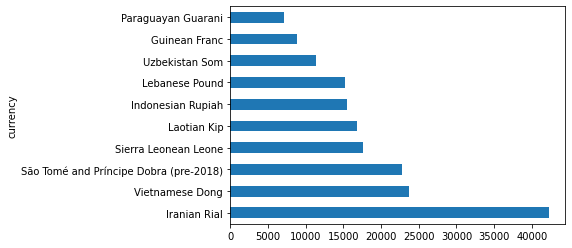

In [30]:
strongDollar=mergeDf[['abbr','currency', 'rates']].sort_values('rates', ascending=False).reset_index().head(10)
strongDollar.drop(columns=['index'], inplace=True)
display(strongDollar)

currencyPlot=strongDollar.plot.barh(x="currency", y="rates", legend=False)

,abbr,currency,rates
4,CLF,Chilean Unit of Account (UF),0.029126
6,KWD,Kuwaiti Dinar,0.307258
7,BHD,Bahraini Dinar,0.377046
8,OMR,Omani Rial,0.384977
9,JOD,Jordanian Dinar,0.709400
11,KYD,Cayman Islands Dollar,0.833197
12,IMP,Manx pound,0.845570
13,JEP,Jersey Pound,0.845570
14,SHP,Saint Helena Pound,0.845570
15,GGP,Guernsey Pound,0.845570


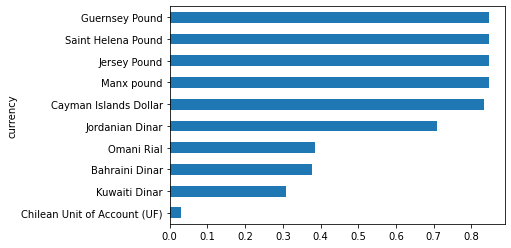

In [34]:
mergeDf=pd.merge(df,df1, on='index')
mergeDf=mergeDf.drop(columns=["disclaimer", "license", "timestamp", "base"]).rename(columns={"index":"abbr"})
weakDollar=mergeDf[['abbr','currency', 'rates']].sort_values('rates', ascending=True).reset_index().head(16)
weakDollar.drop(columns=['index'], inplace=True)
weakDollar = weakDollar.drop(index=[0, 1, 2, 3, 5, 10])
display(weakDollar)

currencyPlot2=weakDollar.plot.barh(x="currency", y="rates", legend=False)
